Employee Attrition


description...

In [213]:
import numpy as np
#Initialize a random number generator
#pass an integer if you want results to be reproducible
rng = np.random.RandomState() 

import matplotlib.pyplot as plt  #plotting library
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
scoring_func = make_scorer(mean_squared_error,greater_is_better=False)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from itertools import combinations
from more_itertools import powerset
import operator

## Load the data set

In [214]:
df = pd.read_csv('Employee-Attrition.csv')

In [215]:
df.size

51450

In [216]:
df.MonthlyIncome

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

In [217]:
df["BusinessTravel"]=df["BusinessTravel"].astype('category').cat.codes
df["Department"]=df["Department"].astype('category').cat.codes
df["EducationField"]=df["EducationField"].astype('category').cat.codes
df["Gender"]=df["Gender"].astype('category').cat.codes
df["JobRole"]=df["JobRole"].astype('category').cat.codes
df["MaritalStatus"]=df["MaritalStatus"].astype('category').cat.codes
df["Over18"]=df["Over18"].astype('category').cat.codes
df["OverTime"]=df["OverTime"].astype('category').cat.codes

In [218]:
dataset=df

In [219]:
dataset['MonthlyIncome']

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

In [220]:
Y=dataset['MonthlyIncome']

In [221]:
Y.describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [222]:
X=df[df.columns[~df.columns.isin(['Attrition','MonthlyIncome'])]]

In [223]:
X.columns.size

33

In [224]:
X.columns.size

33

In [225]:

p=X.columns.size

print(p)




33


In [226]:
y = Y

### Create a training set and a test set





In [227]:
#Split up the big data set into a test set (for final evaluation) and a training set
X_train, X_test, y_train, y_test = train_test_split( X,y, train_size=1400)


Print out (X's are Pandas data frames) the values -- make sure it shuffled

In [228]:
y_train.describe()


count     1400.000000
mean      6469.417857
std       4683.677791
min       1009.000000
25%       2907.750000
50%       4907.000000
75%       8227.250000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [229]:
np.mean(y_train)

6469.417857142857

# Model Fitting

#### Let's first fit using no features (just the intercept $\beta_0$) and all the features ( OLS or Ordinary Least Squares solution)

# Intercept Model

In [230]:
#Train MSE
y_pred = np.ones(y_train.shape)*(np.mean(y_train))
print(y_pred.shape)
print(y_test.shape)
mse_train_just_intercept = mean_squared_error(y_train,y_pred, squared=True)
print(mse_train_just_intercept)

y_pred = np.ones(y_test.shape)*(np.mean(y_train))
mse_test_just_intercept = mean_squared_error(y_test,y_pred, squared=True)

print('\nTraining set MSE using only the intercept: %.2f'%mse_train_just_intercept)
print('\nTest set MSE using only the intercept: %.2f'%mse_test_just_intercept)

print(y_pred)
print(mse_train_just_intercept)

(1400,)
(70,)
21921168.48182398

Training set MSE using only the intercept: 21921168.48

Test set MSE using only the intercept: 26745574.21
[6469.41785714 6469.41785714 6469.41785714 6469.41785714 6469.41785714
 6469.41785714 6469.41785714 6469.41785714 6469.41785714 6469.41785714
 6469.41785714 6469.41785714 6469.41785714 6469.41785714 6469.41785714
 6469.41785714 6469.41785714 6469.41785714 6469.41785714 6469.41785714
 6469.41785714 6469.41785714 6469.41785714 6469.41785714 6469.41785714
 6469.41785714 6469.41785714 6469.41785714 6469.41785714 6469.41785714
 6469.41785714 6469.41785714 6469.41785714 6469.41785714 6469.41785714
 6469.41785714 6469.41785714 6469.41785714 6469.41785714 6469.41785714
 6469.41785714 6469.41785714 6469.41785714 6469.41785714 6469.41785714
 6469.41785714 6469.41785714 6469.41785714 6469.41785714 6469.41785714
 6469.41785714 6469.41785714 6469.41785714 6469.41785714 6469.41785714
 6469.41785714 6469.41785714 6469.41785714 6469.41785714 6469.41785714
 6469.41

# The OLS solution

In [231]:
scaler = StandardScaler()
lin = LinearRegression(normalize=False,fit_intercept=True) 
pipe = make_pipeline(scaler, lin)

pipe.fit(X_train,y_train)
x_pred=pipe.predict(X_test)
# Train MSE
mse_train_OLS = mean_squared_error(y_train, pipe.predict(X_train), squared=True)

# #Test MSE

mse_test_OLS = mean_squared_error(y_test, pipe.predict(X_test), squared=True)

print('\nTraining set MSE using OLS solution: %.2f'%mse_train_OLS)
print('\nTest set MSE using OLS solution: %.2f'%mse_test_OLS)

print(mse_test_OLS)


Training set MSE using OLS solution: 2015285.19

Test set MSE using OLS solution: 1798293.83
1798293.829120252


In [232]:
coef_true=lin.coef_



#### OLS - CV
For reference on the lasso and ridge regression plots, which will be using cross-validation, also calculate the CV hold out MSE using OLS

In [233]:
scaler = StandardScaler()
lin = LinearRegression(normalize=False,fit_intercept=True) 
pipe = make_pipeline(scaler, lin)

pipe.fit(X_train,y_train)

parameters = {}
n_folds=5
gs = GridSearchCV(pipe, parameters, \
                  scoring='neg_mean_squared_error', \
                  cv=n_folds)
gs.fit(X_train,y_train)

scores = -gs.cv_results_['mean_test_score']
scores_std = gs.cv_results_['std_test_score']

mse_train_OLS_CV = scores[0] 
#each entry for different parameter, but no paramters passed, so just first entry

print('\nCVTraining set MSE using OLS solution: %.2f'%mse_train_OLS_CV)


CVTraining set MSE using OLS solution: 2136790.52


#  Lasso

In [234]:
#Cross-validation: pick the number of folds
n_folds = 5
n_alphas = 200 
alphas = np.logspace(-5, 5, n_alphas) #grid search for lambda (aka 'alpha')
parameters = { 'lasso__alpha':alphas}

scaler = StandardScaler()
lasso = Lasso(normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, lasso)
print('\n\nParameters in the pipeline you can set:\n')
print(pipe.get_params().keys()) #reports input names can set (look for the hyper-parameters)
gs = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
gs.fit(X_train,y_train)
#pre_y=gs.predict(X_test)
print('\nDone fitting')



Parameters in the pipeline you can set:

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'lasso', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__normalize', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])

Done fitting


In [235]:
t= mean_squared_error(y_test, gs.predict(X_test), squared=True)



In [236]:
t

1797498.703514183

In [237]:
gs.score(X_test, y_test)

-1797498.703514183

In [238]:
gs.score(X_train, y_train)

-2048344.1658741236

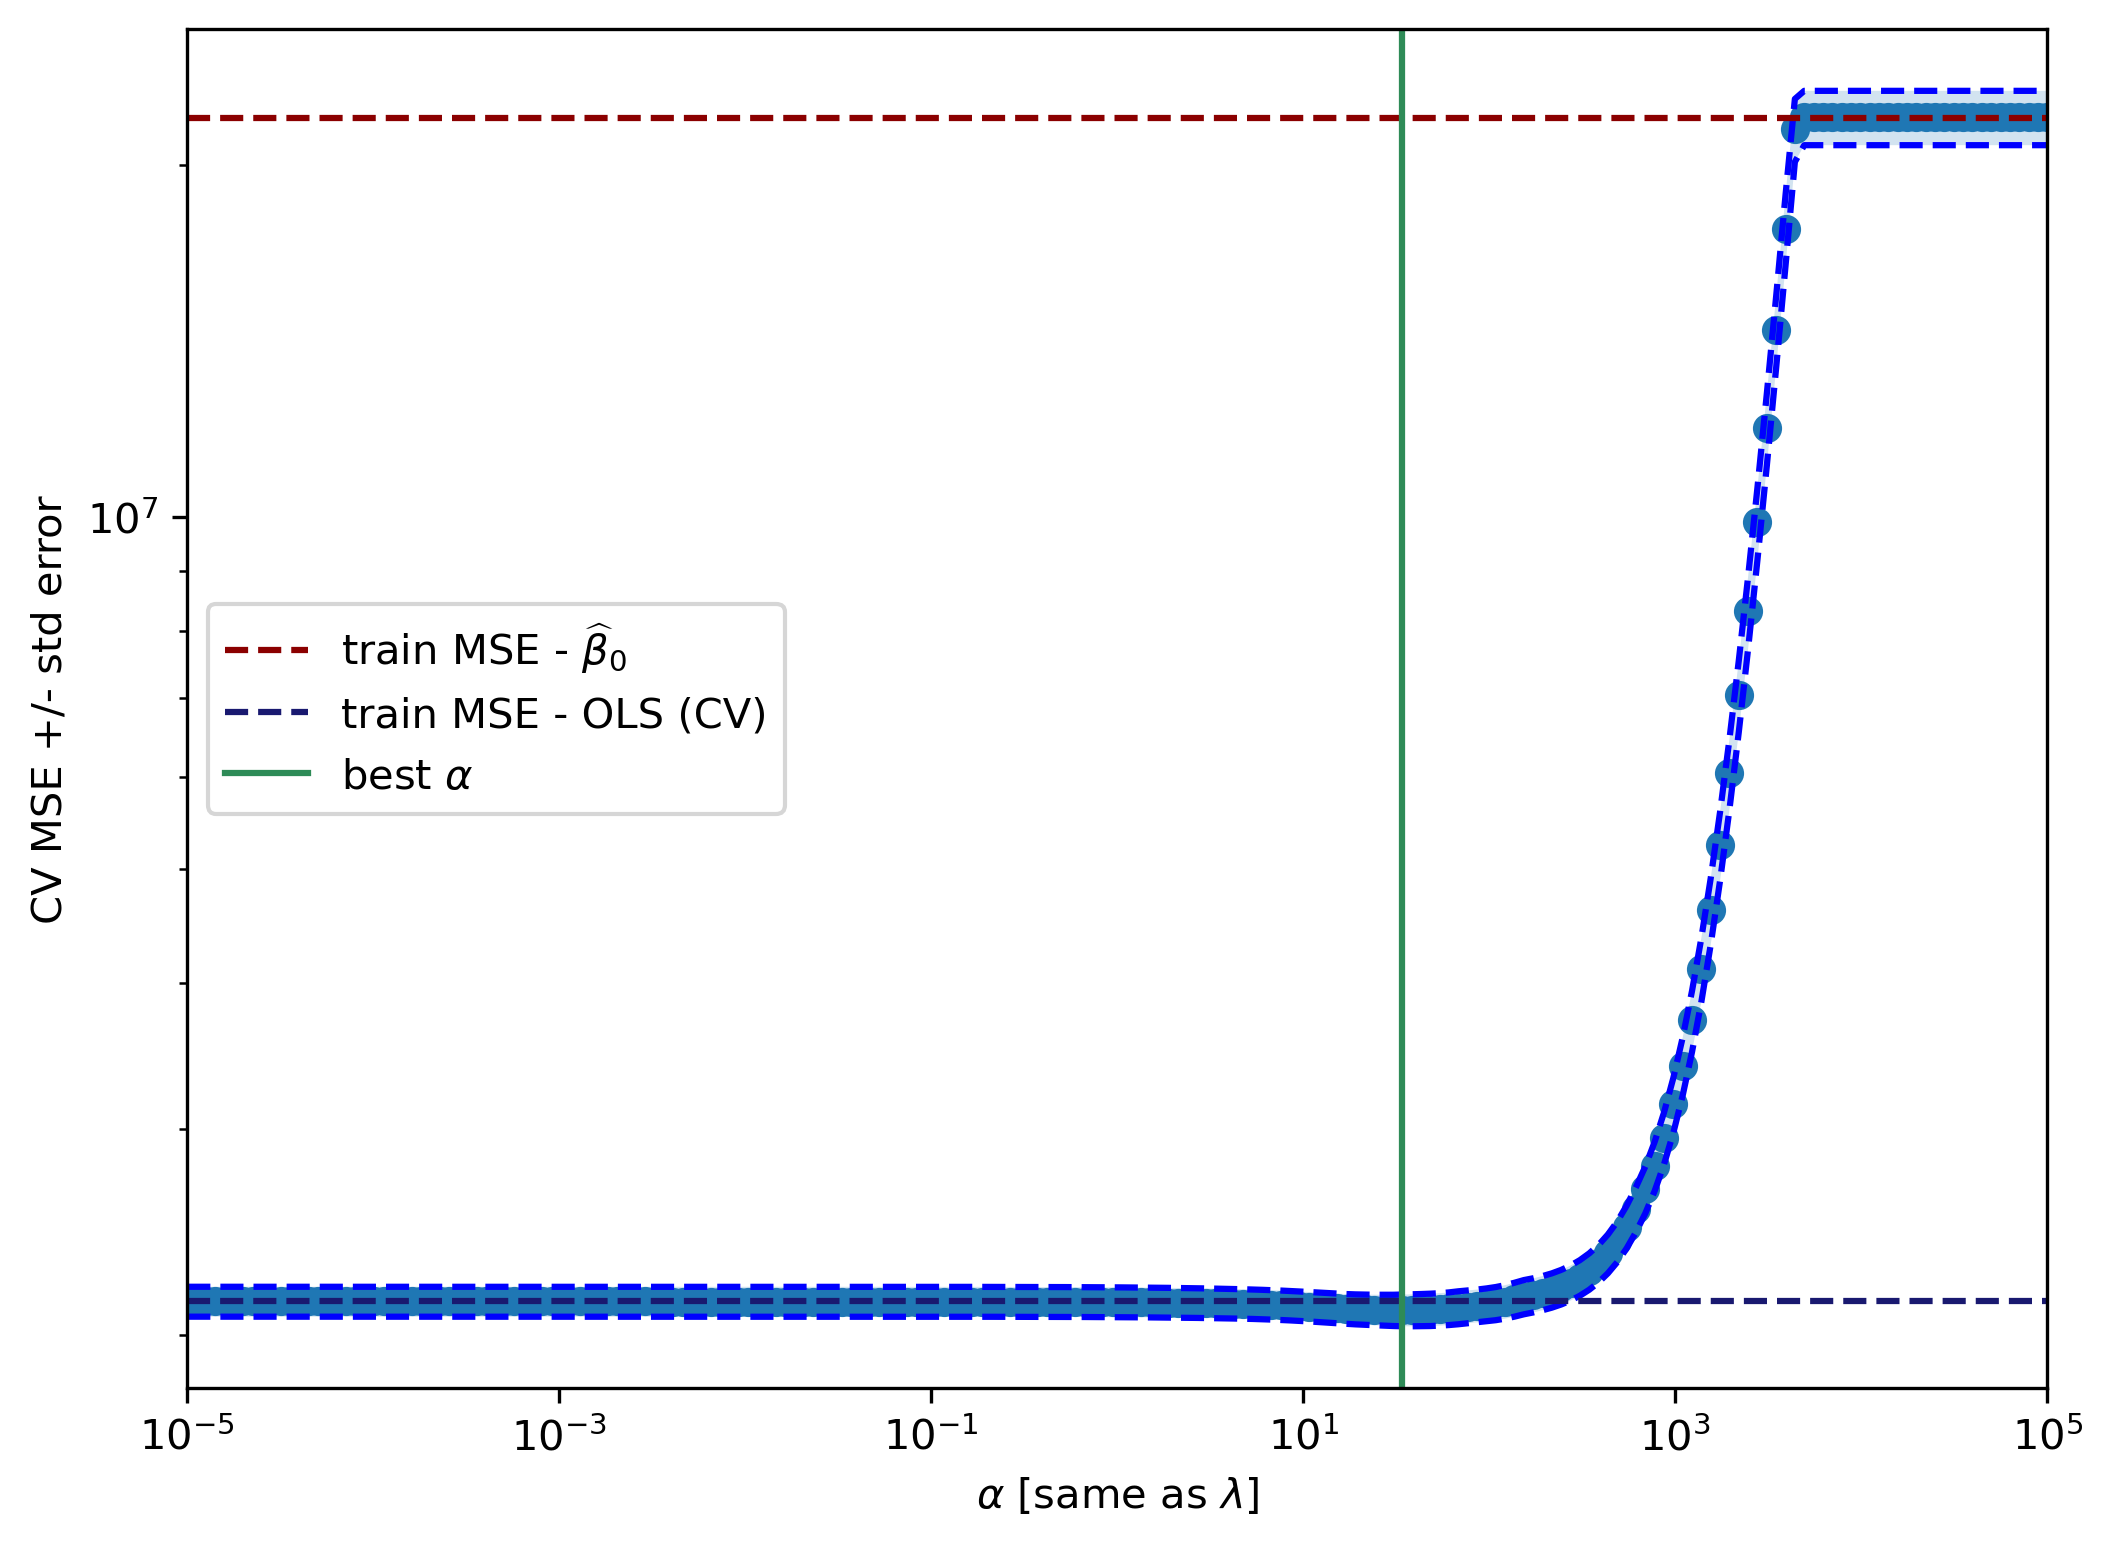

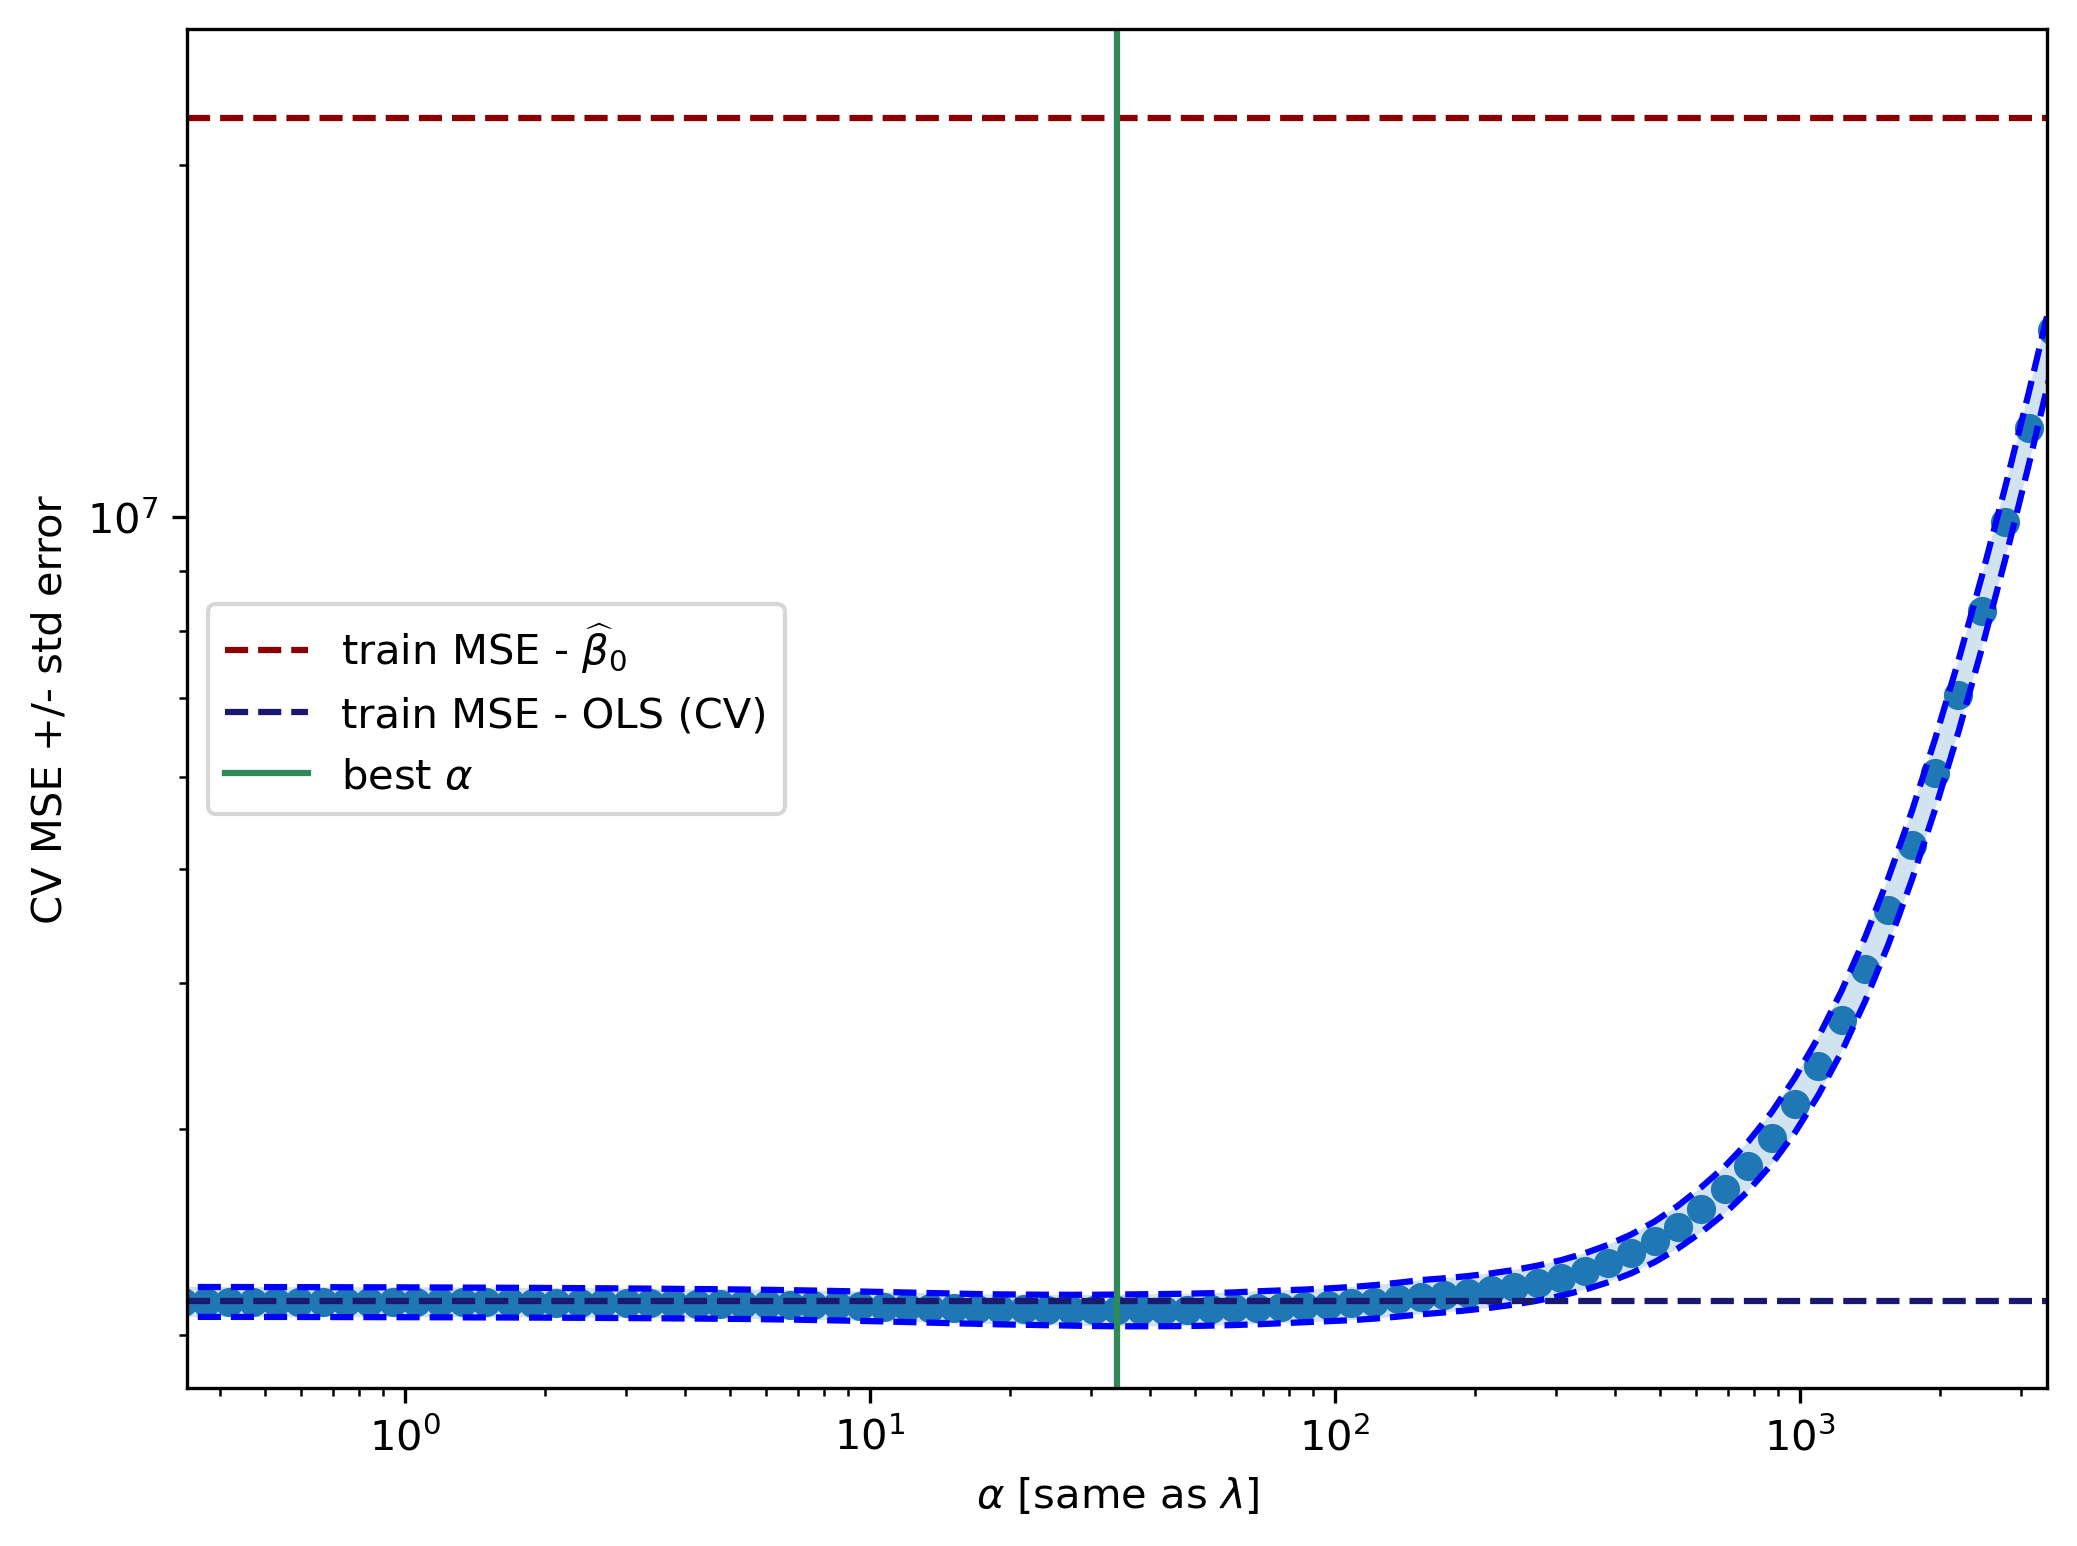

In [239]:
#For the gridcv, it maximizes the negative MSE; scores are negative of what we want
scores = -gs.cv_results_['mean_test_score']
scores_std = gs.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.loglog(alphas, scores,'o')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.loglog(alphas, scores + std_error, 'b--')
plt.loglog(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV MSE +/- std error')
plt.xlabel(r'$\alpha$ [same as $\lambda$]')


#plot baseline fits for training set
#just intercept
plt.axhline(mse_train_just_intercept, linestyle='--',\
            color='darkred', \
            label=r'train MSE - $\widehat{\beta}_0$')

#true coefficients
#plt.axhline(mse_train_using_coef_true, linestyle='--', color='black',label='train MSE - true coef')

#OLS solution (no penalty-- all features)
plt.axhline(mse_train_OLS_CV, linestyle='--', \
            color='midnightblue',label='train MSE - OLS (CV)')

#Mark the value of the best $\alpha$
plt.axvline(alphas[scores.argmin()], linestyle='-', \
            color='seagreen',label=r'best $\alpha$')
plt.xlim([alphas[0], alphas[-1]])
#plt.ylim(mse_train_using_coef_true*.5, 2*mse_train_just_intercept)
plt.legend()




#zoom in - same figure
plt.figure().set_size_inches(8, 6)
plt.loglog(alphas, scores,'o')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.loglog(alphas, scores + std_error, 'b--')
plt.loglog(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV MSE +/- std error')
plt.xlabel(r'$\alpha$ [same as $\lambda$]')


#plot baseline fits for training set
#just intercept
plt.axhline(mse_train_just_intercept, linestyle='--',\
            color='darkred', \
            label=r'train MSE - $\widehat{\beta}_0$')

#true coefficients
#plt.axhline(mse_train_using_coef_true, linestyle='--', \
   #         color='black',label='train MSE - true coef')

#OLS solution (no penalty-- all features)
plt.axhline(mse_train_OLS_CV, linestyle='--', \
            color='midnightblue',label='train MSE - OLS (CV)')

#Mark the value of the best $\alpha$
plt.axvline(alphas[scores.argmin()], linestyle='-', \
            color='seagreen',label=r'best $\alpha$')

plt.xlim(alphas[scores.argmin()]/100,alphas[scores.argmin()]*100)
#plt.ylim(mse_train_using_coef_true*.5, 2*scores[0])
plt.legend()

Text(0, 0.5, 'Coefficients')

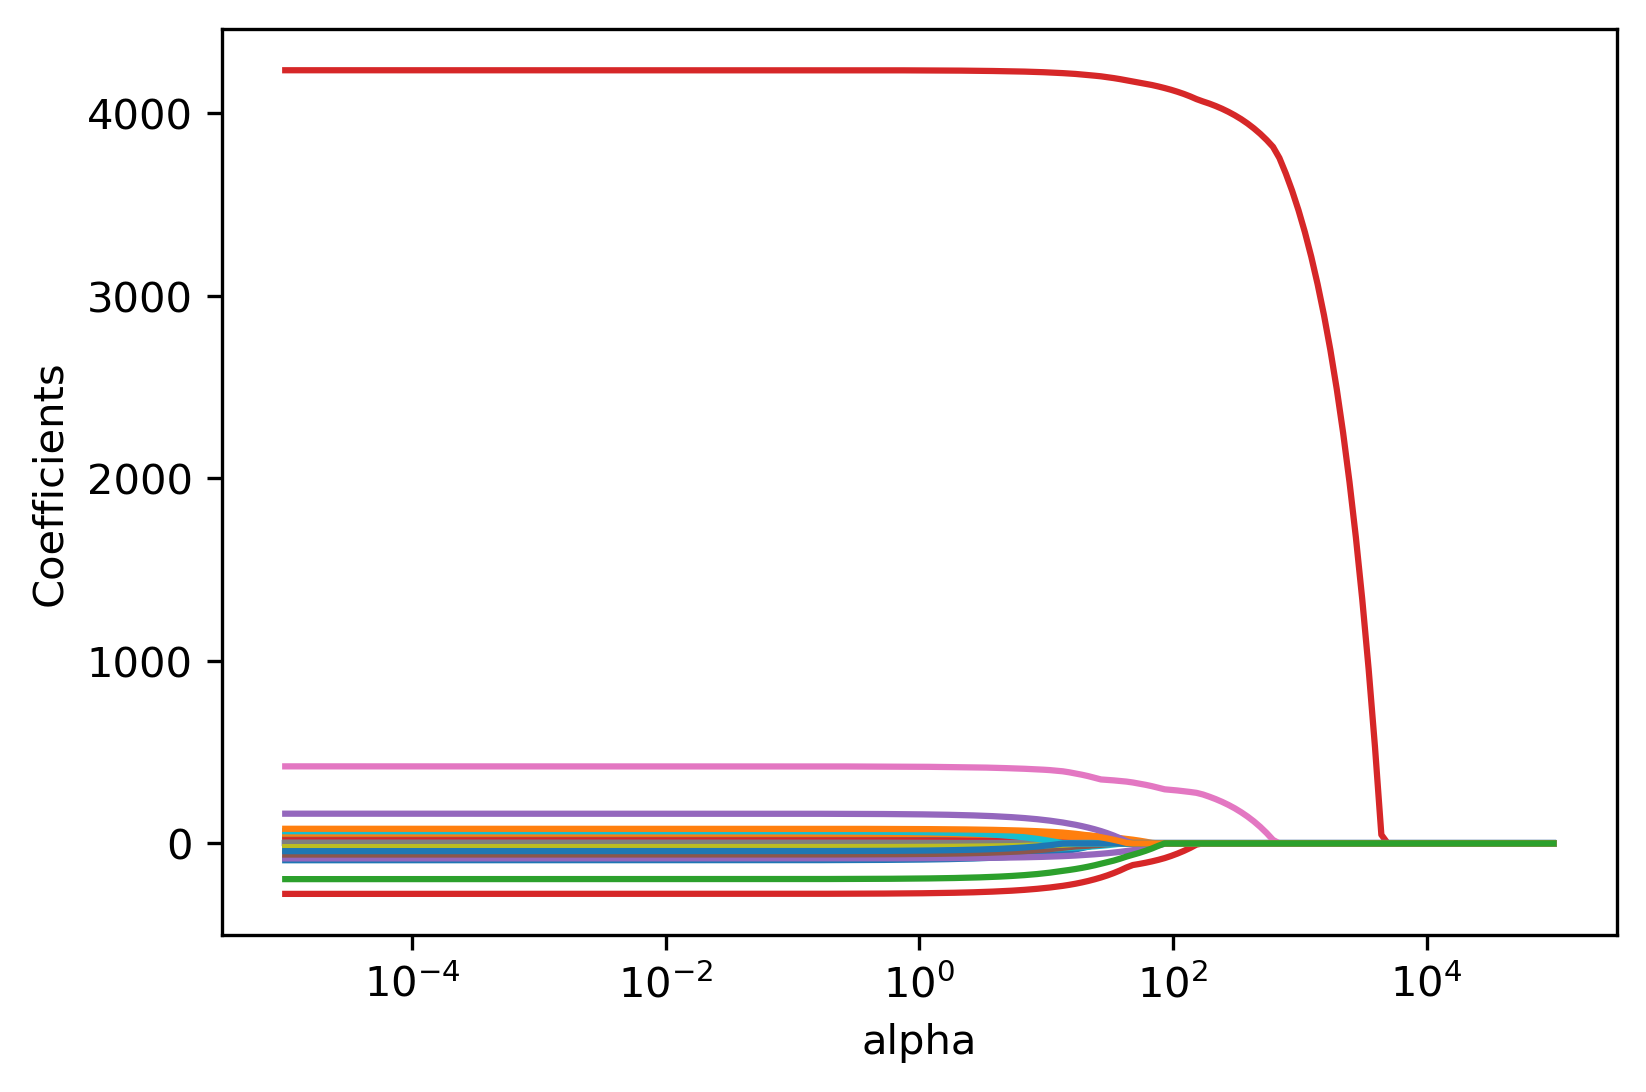

In [240]:
n_alphas = 200 
alphas = np.logspace(-5, 5, n_alphas) #grid search for lambda (aka 'alpha')

scaler = StandardScaler()
lasso = Lasso(normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, lasso)
coefs = []
all_coef=[]
# print(pipe.get_params().keys()) #reports input names can set (look for the hyper-parameters)
parameters = {'lasso__alpha':alphas}
# model = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
# model.fit(X_train,y_train)
for a in alphas:
    pipe.set_params(lasso__alpha=a)
    pipe.fit(X_train, y_train)
    coefs.append(pipe.named_steps['lasso'].coef_)
    all_coef.append({"alpha":a, "coef":pipe.named_steps['lasso'].coef_})

plt.figure()
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')

In [241]:
for a in all_coef:
    print(a["coef"])

[-9.21725591e+01  6.30970056e+01  2.64094702e+01 -2.76445318e+02
 -8.20995416e+01 -1.67752065e+01  1.54422370e+01  0.00000000e+00
  1.38593454e+01 -3.97858323e+01  2.67587646e+01  5.33392785e+01
 -7.93306106e+00  4.23505606e+03  1.62834210e+02 -1.94652128e+01
 -4.49927060e+01 -1.15113009e+01  1.54799844e+01  0.00000000e+00
  3.08104214e+00  5.80646972e+01 -4.10840113e+01  1.71924104e+01
  0.00000000e+00 -6.09692874e+01  4.22061735e+02  4.37350057e+00
 -2.02769690e+01  6.67647748e+01 -4.23739770e+01  8.01379133e+01
 -1.95610743e+02]
[-9.21725547e+01  6.30970044e+01  2.64094689e+01 -2.76445314e+02
 -8.20995406e+01 -1.67752055e+01  1.54422358e+01  0.00000000e+00
  1.38593439e+01 -3.97858310e+01  2.67587635e+01  5.33392771e+01
 -7.93305982e+00  4.23505605e+03  1.62834206e+02 -1.94652117e+01
 -4.49927025e+01 -1.15112998e+01  1.54799824e+01  0.00000000e+00
  3.08104094e+00  5.80646914e+01 -4.10840059e+01  1.71924092e+01
  0.00000000e+00 -6.09692839e+01  4.22061732e+02  4.37349914e+00
 -2.027

In [242]:
best_alpha_lasso = gs.best_params_['lasso__alpha']
print(best_alpha_lasso)

34.092850697468144


In [243]:
scaler = StandardScaler()
lasso = Lasso(alpha=best_alpha_lasso,normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, lasso)
pipe.fit(X_train, y_train)

best_coef_lasso = pipe.named_steps['lasso'].coef_

In [244]:
mean_squared_error(y_test, pipe.predict(X_test), squared=True)

1797498.703514183

In [245]:
print('\nCoefficients    [true]  [lasso]')
for i in range(p):
    print('   Feature %2i:   %5.2f   %.2f'%(i,\
                    coef_true[i],best_coef_lasso[i]))


Coefficients    [true]  [lasso]
   Feature  0:   -92.18   -0.00
   Feature  1:   62.71   32.41
   Feature  2:   26.86   0.00
   Feature  3:   -276.69   -162.42
   Feature  4:   -82.25   -50.34
   Feature  5:   -16.94   -0.00
   Feature  6:   15.60   0.00
   Feature  7:   -1982291334899017.00   0.00
   Feature  8:   13.24   0.00
   Feature  9:   -40.14   -6.00
   Feature 10:   27.13   0.00
   Feature 11:   53.61   15.44
   Feature 12:   -7.58   -0.00
   Feature 13:   4235.23   4192.06
   Feature 14:   162.62   43.00
   Feature 15:   -19.22   -0.00
   Feature 16:   -44.31   -0.00
   Feature 17:   -11.78   -0.00
   Feature 18:   15.35   0.00
   Feature 19:   -9755108301.88   0.00
   Feature 20:    3.20   0.00
   Feature 21:   58.27   0.00
   Feature 22:   -41.20   0.00
   Feature 23:   17.56   0.00
   Feature 24:   -549411.62   0.00
   Feature 25:   -60.89   -0.64
   Feature 26:   422.13   345.27
   Feature 27:    4.17   0.00
   Feature 28:   -20.21   -0.00
   Feature 29:   66.38   0.00


# Ridge -- model fit

In [246]:
#Cross-validation: pick the number of folds
n_folds = 5
#Specify the lambdas we will check.  
n_alphas = 200 
alphas = np.logspace(-10, 10, n_alphas) #grid search for lambda (aka 'alpha')
#Create a scikit-learn 'pipeline' for standardizing the data (scale so unit variance)
#  Then use scikit-learn 'gridsearchCV' with that pipeline in lieu 
#    of having separate for loops.
#  
parameters = { 'ridge__alpha':alphas}
scaler = StandardScaler()
ridge = Ridge(normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, ridge)
print('\n\nParameters in the pipeline you can set:\n')
print(pipe.get_params().keys()) #reports input names can set (look for the hyper-parameters)
#Now do the grid search - one call to fit() tells it to run the 
# pipeline in k-fold CV, in each split fitting for all lambdas
gs = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
gs.fit(X_train,y_train)

#print('\nDone fitting')



Parameters in the pipeline you can set:

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'ridge', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__normalize', 'ridge__random_state', 'ridge__solver', 'ridge__tol'])


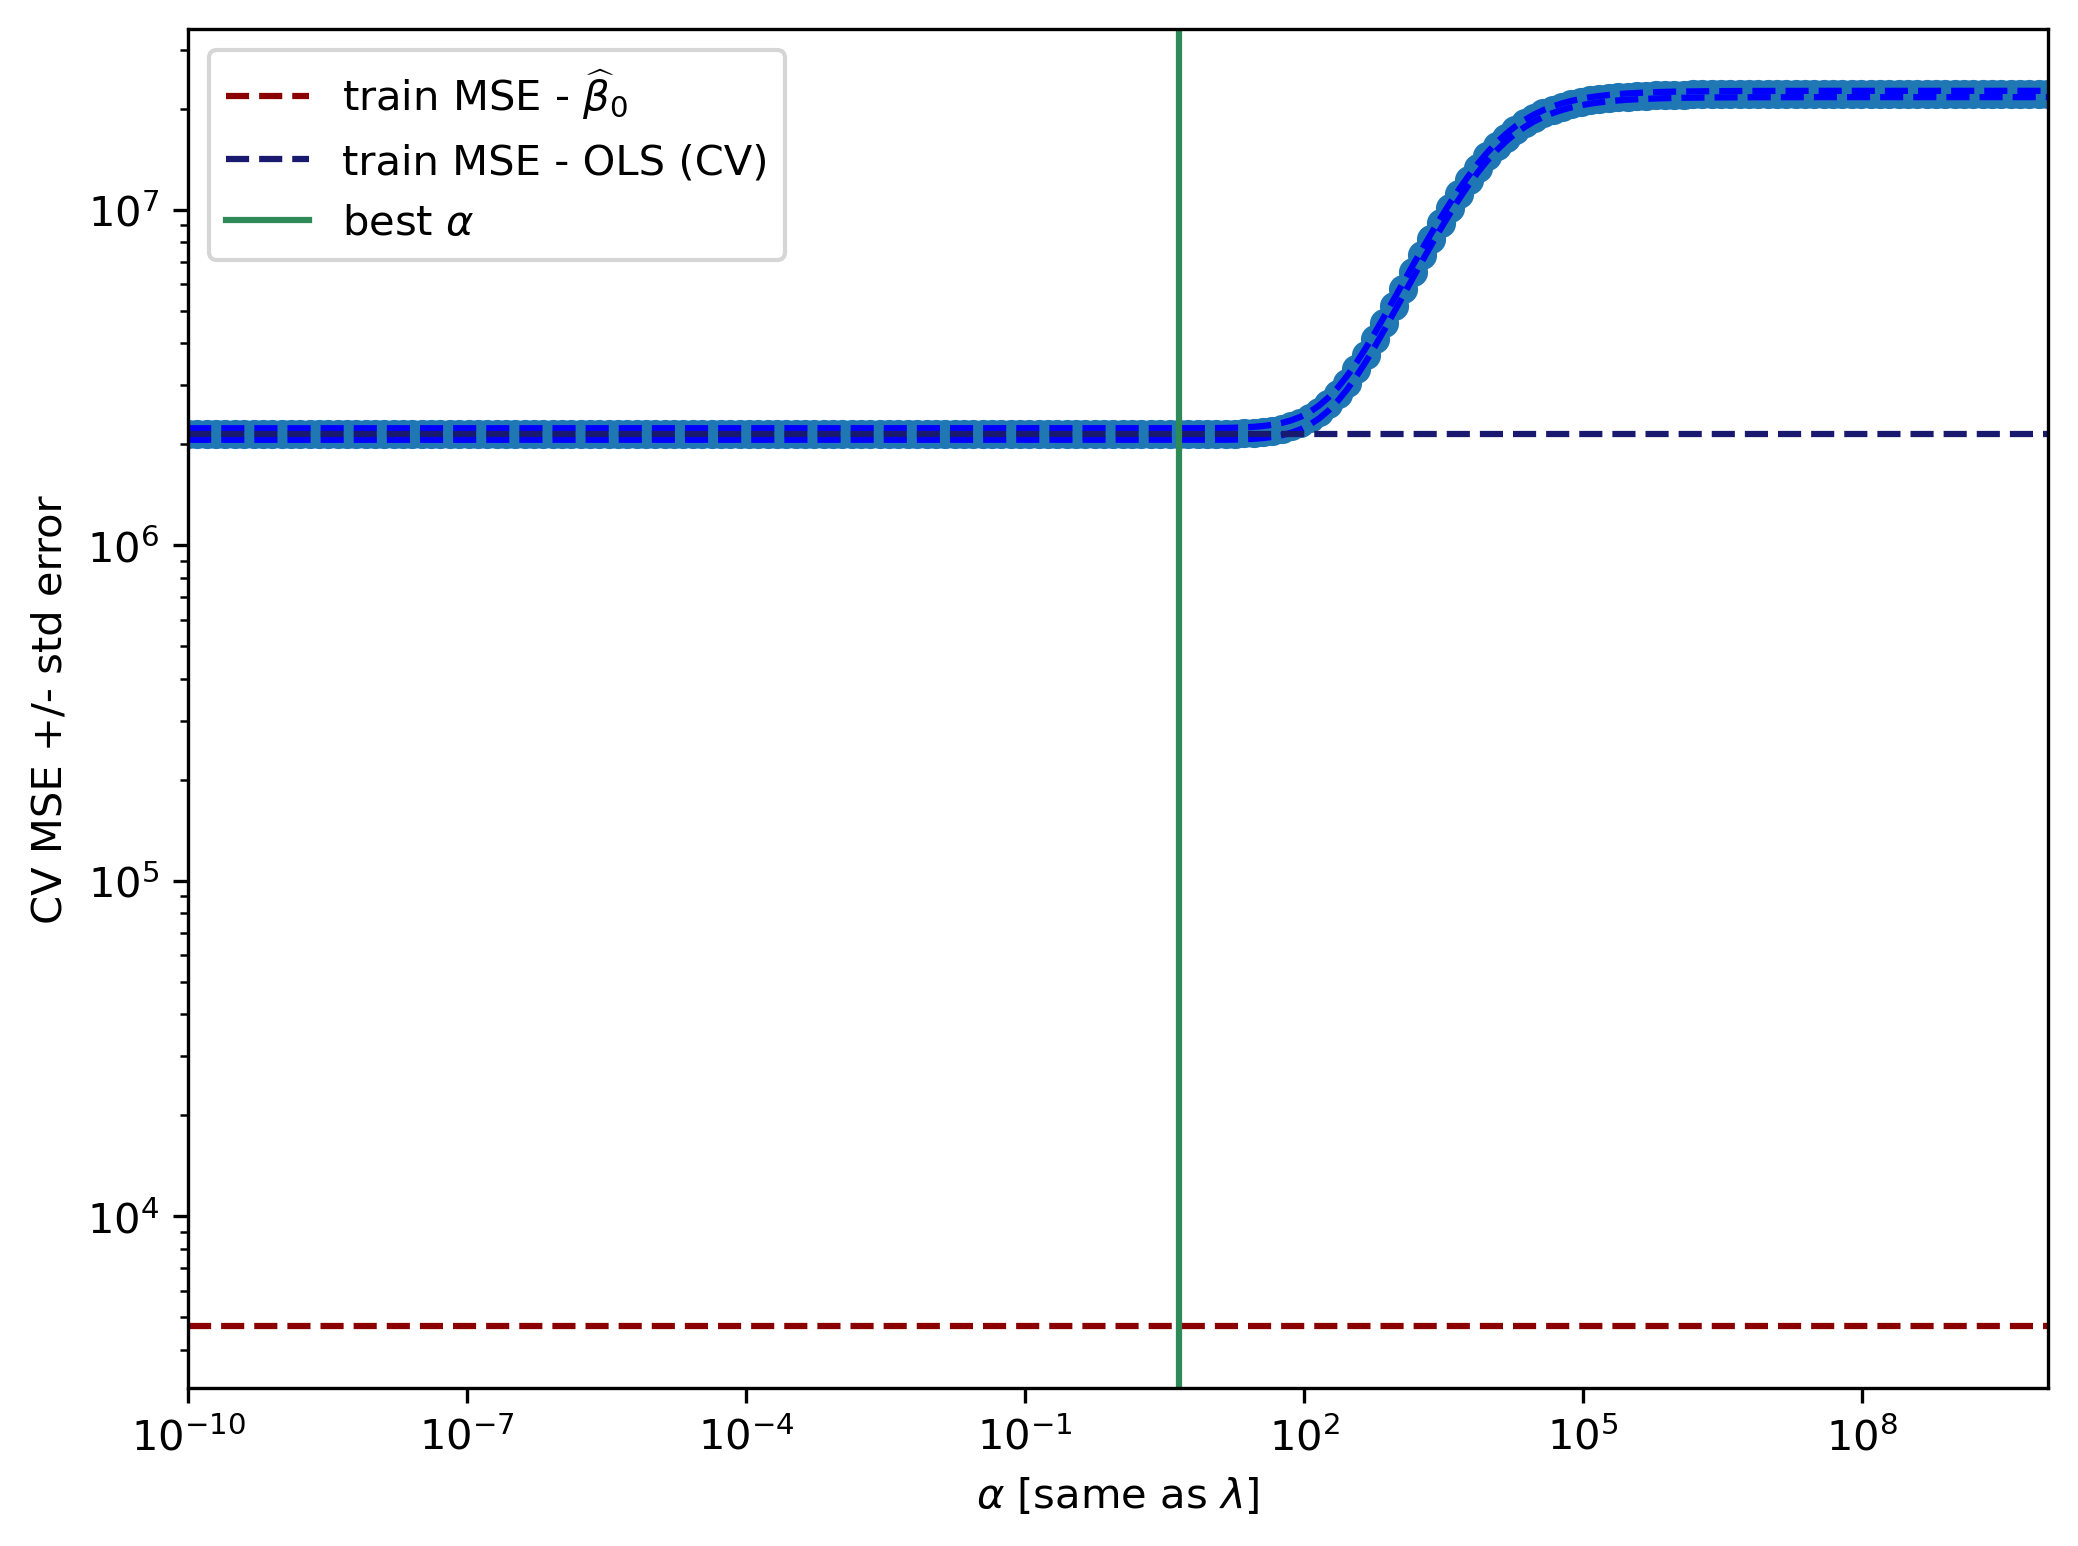

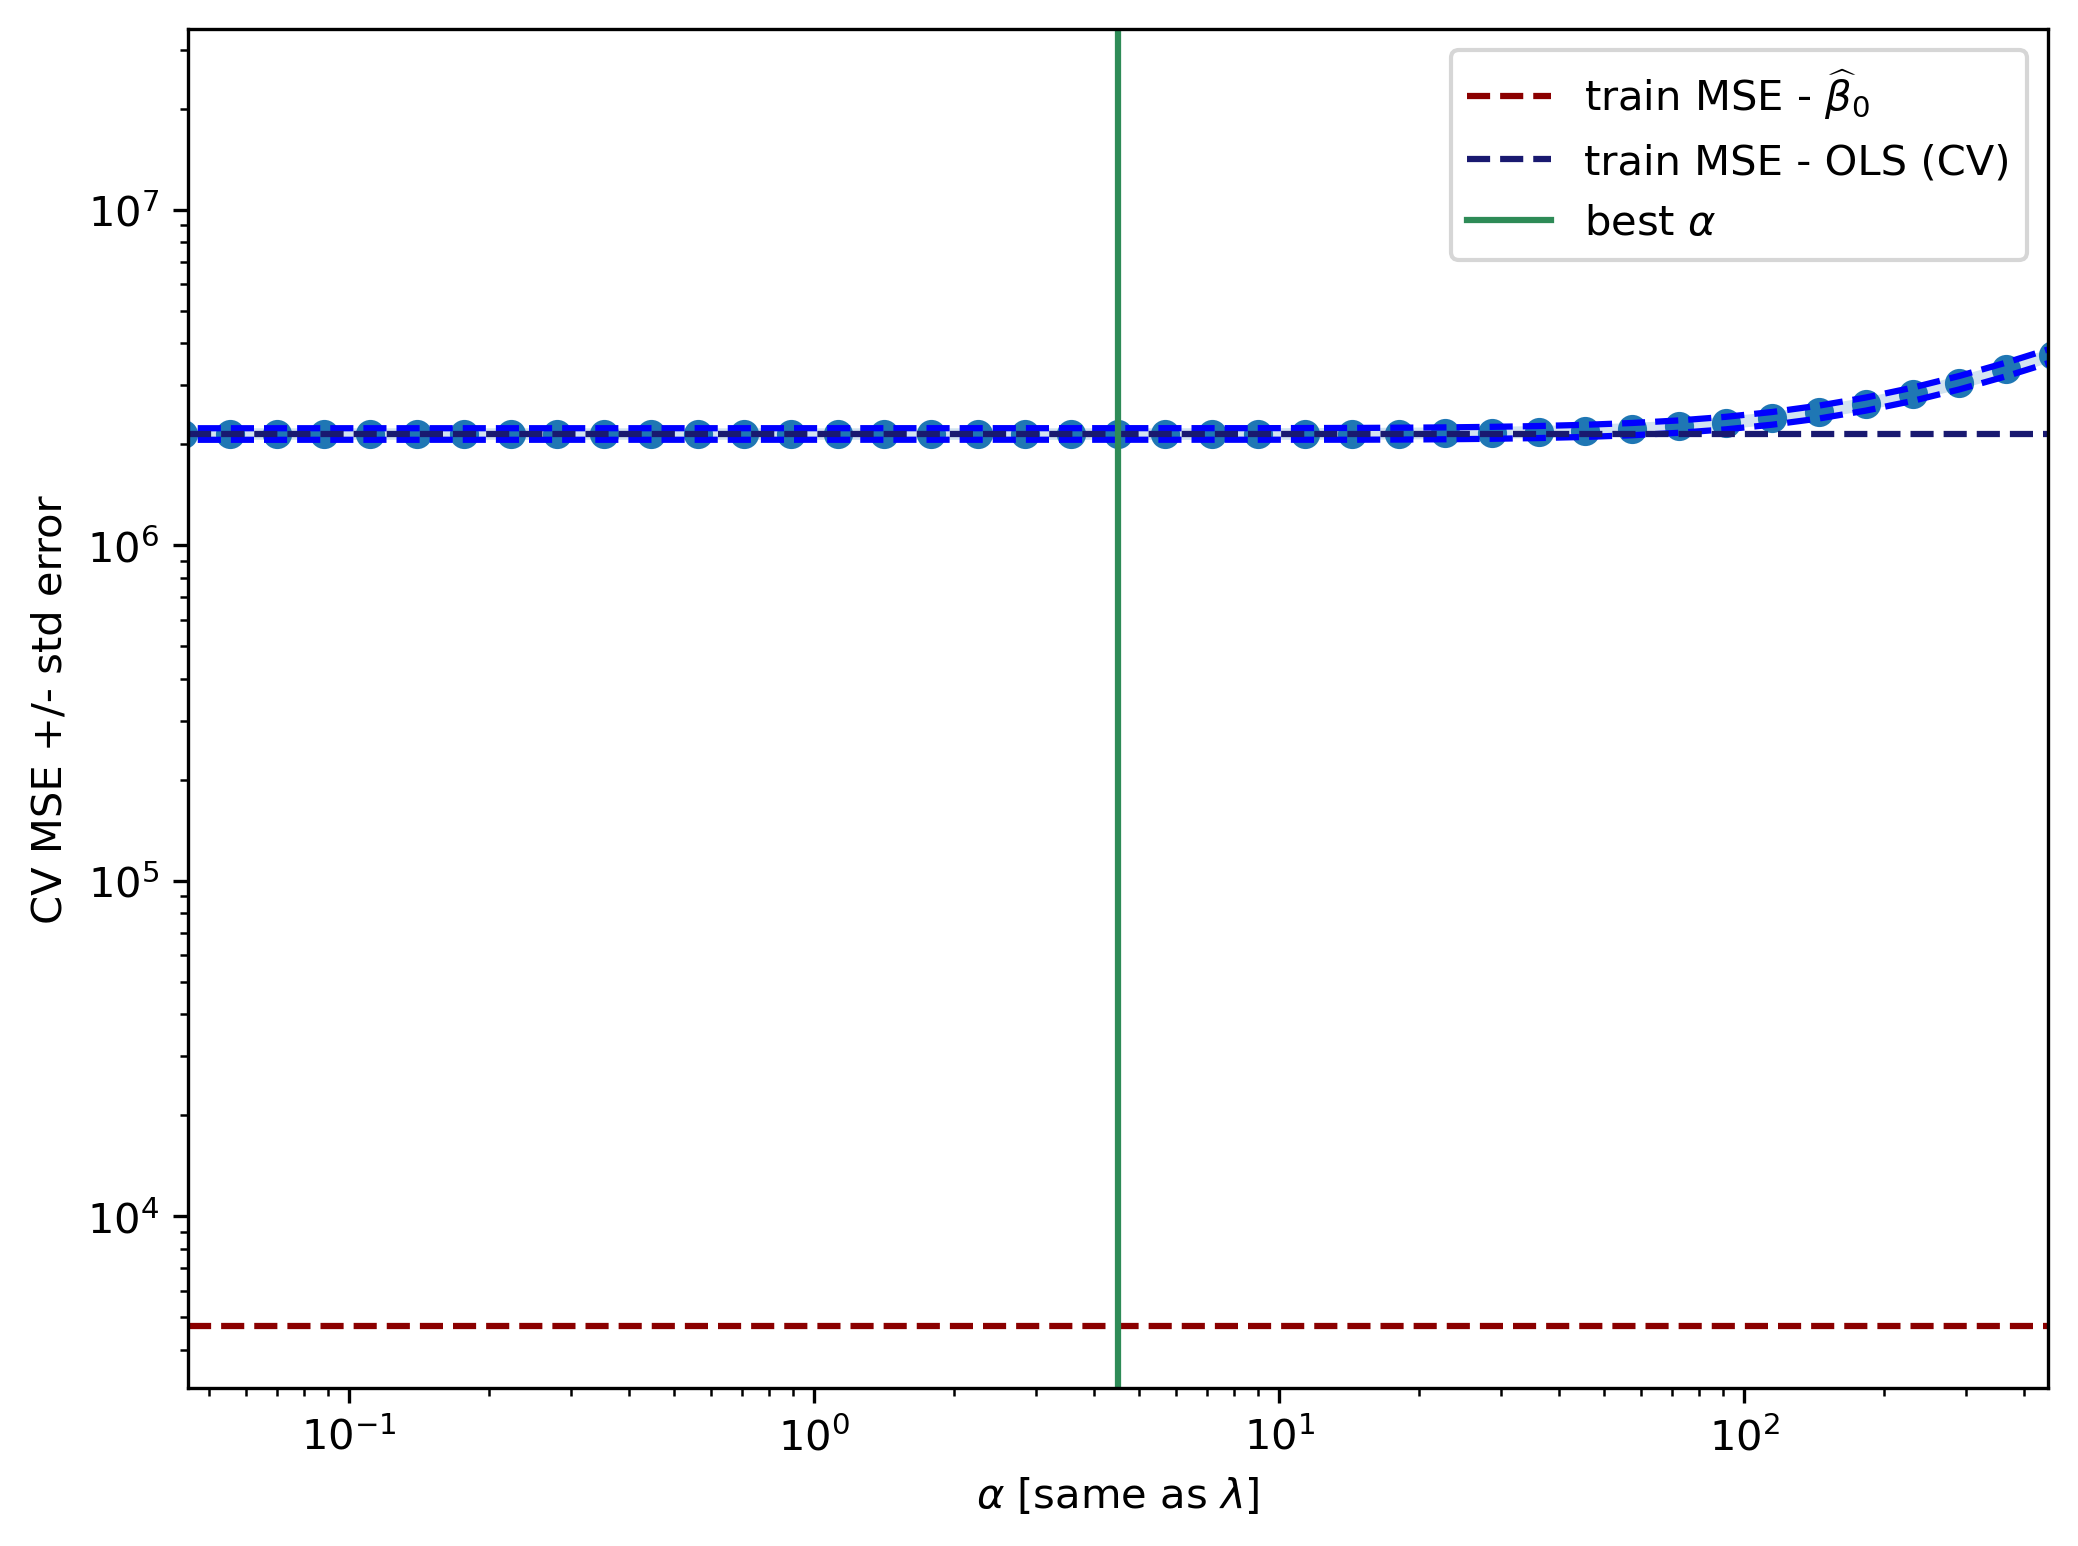

In [ ]:
#For the gridcv, it maximizes the negative MSE; scores are negative of what we want
scores = -gs.cv_results_['mean_test_score']
scores_std = gs.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.loglog(alphas, scores,'o')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.loglog(alphas, scores + std_error, 'b--')
plt.loglog(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV MSE +/- std error')
plt.xlabel(r'$\alpha$ [same as $\lambda$]')


#plot baseline fits for training set
#just intercept
plt.axhline(mse_train_just_intercept, linestyle='--',\
            color='darkred', \
            label=r'train MSE - $\widehat{\beta}_0$')

# #true coefficients
# plt.axhline(mse_train_using_coef_true, linestyle='--', \
#             color='black',label='train MSE - true coef')

#OLS solution (no penalty-- all features)
plt.axhline(mse_train_OLS_CV, linestyle='--', \
            color='midnightblue',label='train MSE - OLS (CV)')

#Mark the value of the best $\alpha$
plt.axvline(alphas[scores.argmin()], linestyle='-', \
            color='seagreen',label=r'best $\alpha$')
plt.xlim([alphas[0], alphas[-1]])
# plt.ylim(mse_train_using_coef_true*.5, 2*mse_train_just_intercept)
plt.legend()




#zoom in - same figure
plt.figure().set_size_inches(8, 6)
plt.loglog(alphas, scores,'o')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.loglog(alphas, scores + std_error, 'b--')
plt.loglog(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV MSE +/- std error')
plt.xlabel(r'$\alpha$ [same as $\lambda$]')


#plot baseline fits for training set
#just intercept
plt.axhline(mse_train_just_intercept, linestyle='--',\
            color='darkred', \
            label=r'train MSE - $\widehat{\beta}_0$')

#true coefficients
# plt.axhline(mse_train_using_coef_true, linestyle='--', \
#             color='black',label='train MSE - true coef')

#OLS solution (no penalty-- all features)
plt.axhline(mse_train_OLS_CV, linestyle='--', \
            color='midnightblue',label='train MSE - OLS (CV)')

#Mark the value of the best $\alpha$
plt.axvline(alphas[scores.argmin()], linestyle='-', \
            color='seagreen',label=r'best $\alpha$')

plt.xlim(alphas[scores.argmin()]/100,alphas[scores.argmin()]*100)
# plt.ylim(mse_train_using_coef_true*.5, 2*scores[0])
plt.legend()

In [ ]:
n_alphas = 200 
alphas = np.logspace(-5, 5, n_alphas) #grid search for lambda (aka 'alpha')

scaler = StandardScaler()
ridge = Ridge(normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, ridge)
coefs = []
co_ridge=[]
# print(pipe.get_params().keys()) #reports input names can set (look for the hyper-parameters)
parameters = {'ridge__alpha':alphas}
# model = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
# model.fit(X_train,y_train)
for a in alphas:
    pipe.set_params(ridge__alpha=a)
    pipe.fit(X_train, y_train)
    coefs.append(pipe.named_steps['ridge'].coef_)
    # print(pipe.named_steps['ridge'].coef_)
    # print("new alpha")
    co_ridge.append({'alpha':a, 'coef':pipe.named_steps['ridge'].coef_})

plt.figure()
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')


In [ ]:
best_alpha_ridge = gs.best_params_['ridge__alpha']
print(best_alpha_ridge)

4.500557675700507


In [ ]:
scaler = StandardScaler()
ridge = Ridge(alpha=best_alpha_ridge,normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, ridge)
pipe.fit(X_train, y_train)

best_coef_ridge = pipe.named_steps['ridge'].coef_



In [ ]:
mean_squared_error(y_test, pipe.predict(X_test))

1676826.006925792

In [ ]:
print('\nCoefficients    [true]  [lasso]')
for i in range(p):
    print('   Feature %2i:   %5.2f   %.2f'%(i,\
                    coef_true[i],best_coef_ridge[i]))


Coefficients    [true]  [lasso]
   Feature  0:   -97.45   -95.46
   Feature  1:   55.82   54.88
   Feature  2:   15.68   15.73
   Feature  3:   -261.10   -253.08
   Feature  4:   -95.93   -95.37
   Feature  5:   -10.86   -11.01
   Feature  6:    9.77   8.77
   Feature  7:   -3908989567399514.50   0.00
   Feature  8:   16.50   16.12
   Feature  9:   -43.98   -42.44
   Feature 10:   27.77   27.47
   Feature 11:   44.90   44.55
   Feature 12:   -16.16   -15.50
   Feature 13:   4249.01   4214.18
   Feature 14:   151.99   146.62
   Feature 15:   -15.08   -15.23
   Feature 16:   -34.22   -34.51
   Feature 17:   -8.86   -7.70
   Feature 18:   13.63   13.14
   Feature 19:   -50850403804.88   0.00
   Feature 20:   16.60   15.77
   Feature 21:   50.94   49.74
   Feature 22:   -23.74   -23.50
   Feature 23:   30.46   30.36
   Feature 24:   -5170293.75   0.00
   Feature 25:   -58.07   -58.90
   Feature 26:   429.45   451.41
   Feature 27:   -11.11   -10.90
   Feature 28:   -0.38   -0.02
   Featur

# Exhaustive search (best subset search)

In [ ]:
p = X_train.shape[1] #the number of columns
list_features = range(0,p)

print(list_features)

for subset in powerset(list_features):
    print(subset)

range(0, 33)
()
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)
(20,)
(21,)
(22,)
(23,)
(24,)
(25,)
(26,)
(27,)
(28,)
(29,)
(30,)
(31,)
(32,)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(0, 21)
(0, 22)
(0, 23)
(0, 24)
(0, 25)
(0, 26)
(0, 27)
(0, 28)
(0, 29)
(0, 30)
(0, 31)
(0, 32)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(1, 14)
(1, 15)
(1, 16)
(1, 17)
(1, 18)
(1, 19)
(1, 20)
(1, 21)
(1, 22)
(1, 23)
(1, 24)
(1, 25)
(1, 26)
(1, 27)
(1, 28)
(1, 29)
(1, 30)
(1, 31)
(1, 32)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(2, 11)
(2, 12)
(2, 13)
(2, 14)
(2, 15)
(2, 16)
(2, 17)
(2, 18)
(2, 19)
(2, 20)
(2, 21)
(2, 22)
(2, 23)
(2, 24)
(2, 25)
(2, 26)
(2, 27)
(2, 28)
(2, 29)
(2, 30)
(2, 31)
(2, 32)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(3, 11)
(3, 12)
(3, 13)
(3

KeyboardInterrupt: 

In [ ]:
numbers=[i for i in range(0,p-2)] 

print(numbers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [ ]:
model = make_pipeline(StandardScaler(), LinearRegression())

#keep a dictionary, with key as the cardinality and value as 
#  a dictionary with values 'features' (list) and 'trainMSE' (float)
#  initialize with empty set (intercept), calculated above
subsets = {}
subsets[0] = {'features':(), 'aicPenalty':0 , 'trainMSE':mse_test_just_intercept, 'testMSE': mse_test_just_intercept,\
     'cardinality': (), 'AIC': mse_test_just_intercept, 'BIC':mse_test_just_intercept}  

numbers=numbers
features=[]

#subset...
for subset in powerset(list_features):
       
    if len(subset)==0:
        continue # for the empty set, skip to next subset
    
    #first just use columns corresponding to this feature 
    cols = list(i for i in subset) #adjust indexing

    X_train_subset = X_train.iloc[:,cols]
    X_test_subset=X_test.iloc[:,cols]
    model.fit(X_train_subset,y_train)
    mse_train = mean_squared_error(y_train, model.predict(X_train_subset))

    mse_test_subset=mean_squared_error(y_test, model.predict(X_test_subset))

    #update if this is the best seen of this cardinality
    k = len(subset)
    
    if k not in list(subsets.keys()):
        #add as currently best
        subsets[k] = {'features':subset, 'trainMSE':mse_train, 'testMSE':mse_test_subset, 'cardinality' : len(subset) }
    else:
        if subsets[k]['trainMSE']>mse_train:
            #add as currently best
            subsets[k] = {'features':subset, 'trainMSE':mse_train , 'testMSE':mse_test_subset, 'cardinality': len(subset) }
    
    print('\n'+'Features: '+str(subset)+' '+  ' MSE: '+str(mse_train))
       

NameError: name 'numbers' is not defined

In [ ]:
subsets[8]['trainMSE']


KeyError: 8

In [ ]:
trainMSE_vals = []#save for plotting
AIC_vals = [] 
BIC_vals = []
AIC_pen=[]
for k in range(p+1):
    subset = subsets[k]['features']
    mse_train = subsets[k]['trainMSE']
    mse_test = subsets[k]['testMSE']
    noise_var_estimate = subsets[p]['trainMSE'] #use the model with all predictors
    
    n_train_samples = X_train.shape[0]
    
    AIC_penalty = 2*k*noise_var_estimate/n_train_samples
    subsets[k]['AIC'] = mse_train+AIC_penalty
    subsets[k]['aicPenalty'] = AIC_penalty
    
    BIC_penalty = np.log(n_train_samples)*k*noise_var_estimate/n_train_samples
    subsets[k]['BIC'] = mse_test+BIC_penalty
    # subsets[k]['aicPenalty']
    # print("MSE: "+ str(mse_train))
    # print("AIC: "+ str(AIC_penalty))
    # print("BIC: "+ str(BIC_penalty))
    trainMSE_vals.append(subsets[k]['trainMSE'])
    AIC_vals.append(subsets[k]['AIC'])
    BIC_vals.append(subsets[k]['BIC'])
    AIC_pen.append(subsets[k]['aicPenalty'])


In [ ]:
for i in range(p+1):
    print("Feature:"+ str(subsets[i]["features"])+", training MSE + AIC: "+ str(subsets[i]["AIC"])+", test MSE: "+ str(subsets[i]["testMSE"]) )

# Forward search 

In [ ]:
#forward...

model = make_pipeline(StandardScaler(), LinearRegression())

#keep a dictionary, with key as the cardinality and value as 
#  a dictionary with values 'features' (list) and 'trainMSE' (float)
#  initialize with empty set (intercept), calculated above
subsets_fw = {}
subsets_fw[0] = {'cardinality':0, 'features':(), 'trainMSE':mse_train_just_intercept, 'testMSE':mse_train_just_intercept, \
              'AIC':mse_train_just_intercept, 'BIC':mse_train_just_intercept}  

selected_features = []
counter = 0
for i in range(0,p):
       
    # if len(subset)==0:
        # continue # for the empty set, skip to next subset
    cols = selected_features
    k = -1
    mse = 99999999
    #mse_test=99999999
    for j in range(0,p):
        if j not in cols:
            cols.append(j)
        else:
            continue
        
        X_train_subset = X_train.iloc[:,cols]
        X_test_subset=X_test.iloc[:, cols]
        # print('X_train_subset shape: ' + str(X_train_subset.shape))
        model.fit(X_train_subset,y_train)
        mse_train = mean_squared_error(y_train, model.predict(X_train_subset))
        mse_test_fw = mean_squared_error(y_test, model.predict(X_test_subset))
        print('cols: ' + str(cols) + '\ttrainMSE: ' + str(mse_train)+ '\ttestMSE: ' + str(mse_test_fw))
        
        if mse_train < mse:
            k = j
            mse = mse_train
            mse_test=mse_test_fw

        cols = selected_features

        cols.remove(j)
    
    selected_features.append(k)
    counter = counter + 1
    print(selected_features)
    subsets_fw[len(selected_features)] = {'cardinality': len(selected_features), 'features': str(selected_features), 'trainMSE': mse, 'testMSE':mse_test_fw}
    

cols: [0]	trainMSE: 16627119.92755393	testMSE: 17313203.70243723
cols: [1]	trainMSE: 22106396.937973373	testMSE: 22482116.16261339
cols: [2]	trainMSE: 22124934.99031406	testMSE: 22645326.378977824
cols: [3]	trainMSE: 22041350.01001744	testMSE: 23038299.695684373
cols: [4]	trainMSE: 22122714.094671704	testMSE: 22579251.17715706
cols: [5]	trainMSE: 21916402.0719714	testMSE: 22624985.62321833
cols: [6]	trainMSE: 22046015.87644486	testMSE: 23600370.038545974
cols: [7]	trainMSE: 22124936.005655102	testMSE: 22646822.79540612
cols: [8]	trainMSE: 22121979.857938554	testMSE: 22608724.056534477
cols: [9]	trainMSE: 22124670.33644445	testMSE: 22637581.575317584
cols: [10]	trainMSE: 22095487.124920793	testMSE: 22773572.47823001
cols: [11]	trainMSE: 22120418.835566353	testMSE: 22622241.429322343
cols: [12]	trainMSE: 22123060.428021062	testMSE: 22593338.06398693
cols: [13]	trainMSE: 2161722.788461228	testMSE: 1852379.5970229073
cols: [14]	trainMSE: 21938536.929359	testMSE: 22271733.361332748
cols: [1

In [ ]:
#forward...
trainMSE_vals_fw = []#save for plotting
AIC_vals_fw = [] 
BIC_vals_fw = []

for k in range(p+1):
    subset = subsets_fw[k]['features']
    mse_train = subsets_fw[k]['trainMSE']
    mse_test = subsets_fw[k]['testMSE']
    noise_var_estimate = subsets_fw[p]['trainMSE'] #use the model with all predictors
    
    n_train_samples = X_train.shape[0]
    
    AIC_penalty = 2*k*noise_var_estimate/n_train_samples
    subsets_fw[k]['AIC'] = mse_train+AIC_penalty
    BIC_penalty = np.log(n_train_samples)*k*noise_var_estimate/n_train_samples
    subsets_fw[k]['BIC'] = mse_test+BIC_penalty
    print("MSE: "+ str(mse_train)+ "Penalty: "+str(AIC_penalty) + "Cardinality: "+str(k))
    # print("AIC: "+ str(AIC_penalty))
    # print("BIC: "+ str(BIC_penalty))
    trainMSE_vals_fw.append(subsets_fw[k]['trainMSE'])
    AIC_vals_fw.append(subsets_fw[k]['AIC'])
    BIC_vals_fw.append(subsets_fw[k]['BIC'])
# print(BIC_vals_fw)
# print("test")
# print(AIC_vals_fw)
#print(trainMSE_vals_fw+BIC_vals_fw)

In [ ]:
subsets_fw

In [ ]:
for i in range(p+1):
    print("Feature:"+ str(subsets_fw[i]["features"])+", training MSE + AIC: "+ str(subsets_fw[i]["AIC"])+", test MSE: "+ str(subsets_fw[i]["testMSE"]) )

In [ ]:
for i in range(p+1):
    print("Feature:"+ str(subsets_fw[i]["features"])+", AIC: "+ str(subsets_fw[i]["AIC"]) )


# Backward search

In [ ]:
# #backward...

# model = make_pipeline(StandardScaler(), LinearRegression())

# #keep a dictionary, with key as the cardinality and value as 
# #  a dictionary with values 'features' (list) and 'trainMSE' (float)
# #  initialize with empty set (intercept), calculated above
# subsets_bw = {}
# selected_features = list(i for i in range(0,p))
# discarded_features = ()
# counter = 0

# for i in range(0,p):
       
#     # if len(subset)==0:
#         # continue # for the empty set, skip to next subset
#     cols = selected_features
#     k = -1
#     setList={'element': (), 'value': 0}
#     mse = 99999999
#     mse_test=9999999
#     selected_set = ()
#     for j in range(0,p+1):
#         if j in list(discarded_features):
#             continue
        
#         # cols = cols + (j,)
#         cols = list(x for x in cols if x != j)
        
#         if len(cols)==0:
#             continue
    
#         #first just use columns corresponding to this feature 
#         #cols = tuple(i for i in range(0,i+1)) #adjust indexing
#         X_train_subset = X_train.iloc[:,cols]
#         X_test_subset=X_test.iloc[:,cols]
#         # print('X_train_subset shape: ' + str(X_train_subset.shape))
        
#         model.fit(X_train_subset,y_train)
#         mse_train = mean_squared_error(y_train, model.predict(X_train_subset))
#         mse_test_bw = mean_squared_error(y_test, model.predict(X_test_subset))
#         print('cols: ' + str(cols) + '\ttrainMSE: ' + str(mse_train)+ '\ttrainMSE: ' + str(mse_test_bw))


#         if mse_train < mse:
#             k = set(selected_features) - set(cols)
#             selected_set = cols
#             mse = mse_train
#             mse_teset=mse_test_bw

#         cols = selected_features

#         setList[j]={'element': cols, 'value': mse_train}
#         print("Decision")

#     print("best subset backward:" +str(selected_set))
    
#     subsets_bw[counter] = {'cardinality': len(selected_set), 'features': selected_set, 'trainMSE': mse, 'testMSE': mse_test_bw}
#     selected_features = tuple(x for x in cols if x != k)
#     #print(selected_features)

#    # dis=

#     discarded_features = discarded_features + (k,)
#     counter = counter + 1


In [ ]:

#Jubayer...
model = make_pipeline(StandardScaler(), LinearRegression())

#keep a dictionary, with key as the cardinality and value as 
#  a dictionary with values 'features' (list) and 'trainMSE' (float)
#  initialize with empty set (intercept), calculated above

subsets_bw = {}
  

selected_features = tuple(i for i in range(0,p))
discarded_features = ()
counter = 0
for i in range(0,p):
       
    # if len(subset)==0:
        # continue # for the empty set, skip to next subset
    cols = selected_features
    k = -1
    mse = 99999999
    mse_test=9999999
    selected_set = ()
    for j in range(-1,p):
        if j in list(discarded_features):
            continue
        
        # cols = cols + (j,)
        cols = list(x for x in cols if x != j)
        # print(cols)
        
        if len(cols)==0:
            continue
        
        X_train_subset = X_train.iloc[:,cols]
        X_test_subset=X_test.iloc[:, cols]
        # print('X_train_subset shape: ' + str(X_train_subset.shape))
        
        model.fit(X_train_subset,y_train)
        mse_train = mean_squared_error(y_train, model.predict(X_train_subset))
        mse_test_bw = mean_squared_error(y_test, model.predict(X_test_subset))
        print('cols: ' + str(cols) + '\ttrainMSE: ' + str(mse_train) + '\ttestMSE: ' + str(mse_test_bw))

        if mse_train < mse:
            k = j
            selected_set = cols
            mse = mse_train
            mse_test=mse_test_bw

        cols = selected_features
    

    subsets_bw[counter] = {'cardinality': len(selected_set), 'features': selected_set, 'trainMSE': mse, 'testMSE': mse_test}
    selected_features = tuple(x for x in cols if x != k)

    discarded_features = discarded_features + (k,)
    counter = counter + 1
    
    print('cardinality: ' + str(len(selected_set))+ ' features: ' + str(selected_set)+' trainMSE: '+str(mse))
    subsets_bw[counter] = {'cardinality':0, 'features':(), 'trainMSE':mse_train_just_intercept, 'testMSE': mse_train_just_intercept, 'AIC':mse_train_just_intercept, 'BIC':mse_train_just_intercept}

print('counter: ' + str(len(subsets_bw)))     

In [ ]:
for i in range(p+1):
    print("Feature:"+ str(subsets_bw[i]["features"])+", Test MSE: "+ str(subsets_bw[i]["trainMSE"]) )

In [ ]:
#backward...
trainMSE_vals_bw = []#save for plotting
AIC_vals_bw = [] 
BIC_vals_bw = []

for k in range(p+1):
    subset = subsets_bw[k]['features']
    mse_train = subsets_bw[k]['trainMSE']
    mse_test = subsets_bw[k]['testMSE']
    noise_var_estimate = subsets_bw[0]['trainMSE'] #use the model with all predictors
    
    n_train_samples = X_train.shape[0]
    
    AIC_penalty = 2*k*noise_var_estimate/n_train_samples
    
    subsets_bw[k]['AIC'] = mse_train+AIC_penalty
    BIC_penalty = np.log(n_train_samples)*k*noise_var_estimate/n_train_samples
    subsets_bw[k]['BIC'] = mse_test+BIC_penalty
    # print("MSE: "+ str(mse_train))
    # print("AIC: "+ str(AIC_penalty))
    # print("BIC: "+ str(BIC_penalty))

    trainMSE_vals_bw.append(subsets_bw[k]['trainMSE'])
    AIC_vals_bw.append(subsets_bw[k]['AIC'])
    BIC_vals_bw.append(subsets_bw[k]['BIC'])

#print(AIC_vals_bw)

In [ ]:
for i in range(p+1):
    print("Feature:"+ str(subsets_bw[i]["features"])+", training MSE + AIC: "+ str(subsets_bw[i]["AIC"])+", test MSE: "+ str(subsets_bw[i]["testMSE"]) )

In [ ]:
print(AIC_vals)
print(AIC_vals_fw)
print(AIC_vals_bw )



In [ ]:
for i in range(p+1):
    print("Feature:"+ str(subsets_bw[i]["features"])+", AIC: "+ str(subsets_bw[i]["AIC"]) )

# Answer of Question C

In [ ]:
AIC_vals_bw
#print(AIC_vals_bw)
def reverseList(items):
    return [item for item in reversed(items)]

r_AIC_vals_bw=reverseList(AIC_vals_bw)
#print(reverseList(AIC_vals_bw))

In [ ]:
AIC_vals_bw

In [ ]:

plt.figure()
cardinalities = range(p+1)
plt.scatter(cardinalities, AIC_vals,color='red',linewidth=6,label='Subset selection')
plt.scatter(cardinalities, AIC_vals_fw,color='seagreen',linewidth=6,label='Forward stepwise')
plt.scatter(cardinalities, r_AIC_vals_bw,color='cornflowerblue',linewidth=6,label='Backward stepwise')
plt.title('Plot of Mean Square Error of Residuals + AIC Penalty')
plt.xlabel("# Cardinality")
plt.ylabel("Mean Square Error of Residuals + AIC Penalty")

#Mark the value of the best MSE
plt.axvline(trainMSE_vals.index(min(trainMSE_vals)), linestyle='--', color='lightcoral',label=r'best trainMSE')

#Mark the value of the best AIC
plt.axvline(AIC_vals.index(min(AIC_vals)), linestyle='--', color='palegreen',label=r'best AIC')

#Mark the value of the best BIC
#plt.axvline(BIC_vals.index(min(BIC_vals)), linestyle='--', \
 #         color='lightskyblue',label=r'best BIC')

#plt.ylim(0,50)
plt.legend(loc='upper right')
# plt.xlim(-0.5, p+10)
plt.show()

In [ ]:
print("Backward")
for i in range(p+1):
    print("Feature:"+ str(subsets_bw[i]["features"])+", AIC: "+ str(subsets_bw[i]["trainMSE"]) )

print("forward")
for i in range(p+1):
    print("Feature:"+ str(subsets_fw[i]["features"])+", AIC: "+ str(subsets_fw[i]["trainMSE"]) )
print("subset")
for i in range(p+1):
    print("Feature:"+ str(subsets_fw[i]["features"])+", AIC: "+ str(subsets_fw[i]["trainMSE"]) )

In [ ]:
X.describe